In [1]:
import pandas as pd

labels_df = pd.read_csv("training-english/labels_training.tsv", sep="\t")
sentences_df = pd.read_csv("training-english/sentences_training.tsv", sep="\t")
print(f"📄 Sentences file: {len(sentences_df):,} rows")
print(f"🏷️  Labels file:   {len(labels_df):,} rows")

merged_df = pd.merge(sentences_df, labels_df, on=["Text-ID", "Sentence-ID"], how="outer")
merged_df.to_csv("training-english/merged_training.tsv", sep='\t', index=False)
print(f"✅ Merged file:    {len(merged_df):,} rows")
print("✅ Merged file saved as merged_training.tsv")


📄 Sentences file: 44,758 rows
🏷️  Labels file:   44,758 rows
✅ Merged file:    44,758 rows
✅ Merged file saved as merged_training.tsv


📄 Dataset Sizes Before Merging:
  • merged_training.tsv:    44,758 rows × 41 columns
  • training_augmented.tsv: 49,804 rows × 3 columns



/var/folders/21/w5rh64gx6k1c7p38prdv0vhc0000gn/T/ipykernel_9050/1963342648.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_training = pd.concat([merged_training, training_augmented], ignore_index=True)


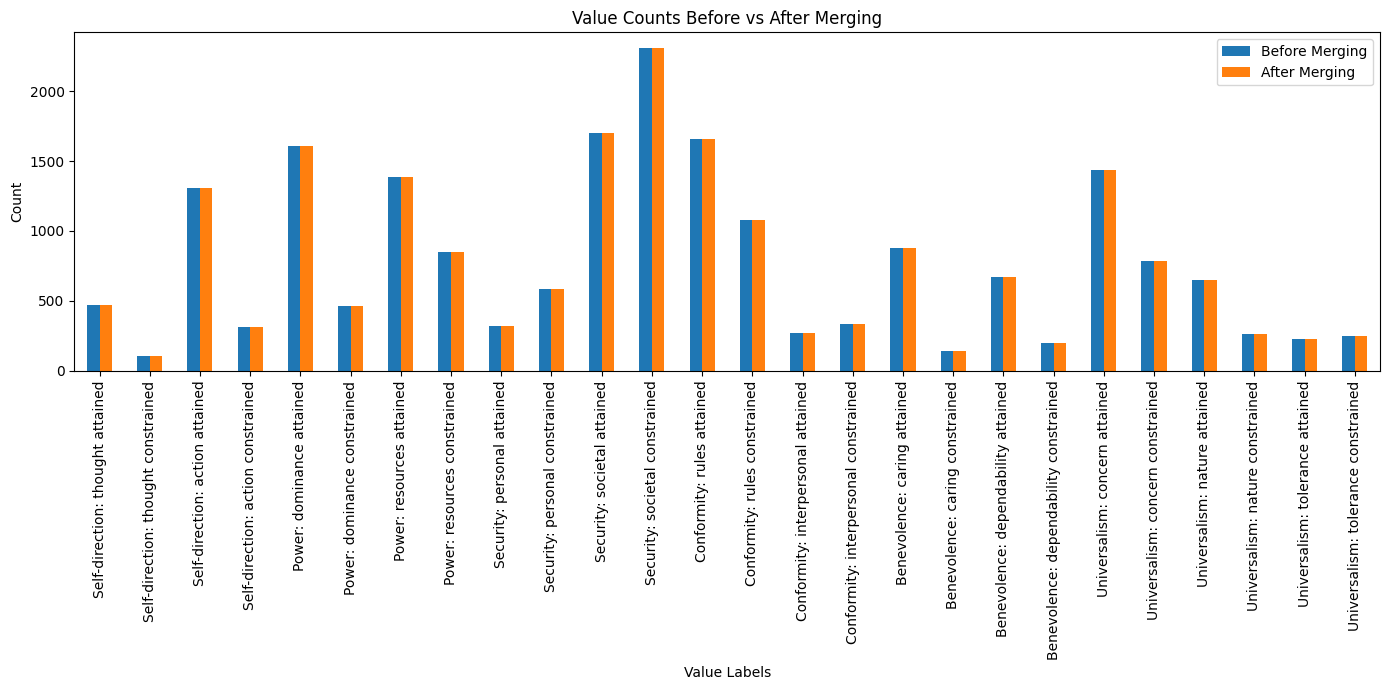


✅ Final dataset saved at: /Users/aditya/Desktop/aditya/Project 1/data preprocessing/training-english/final_training.tsv


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: File paths ===
merged_path = "training-english/merged_training.tsv"
augmented_path = "training-english/training_augmented.tsv"

# === Step 2: Load datasets ===
merged_training = pd.read_csv(merged_path, sep="\t")
training_augmented = pd.read_csv(augmented_path, sep="\t")

# === Step 3: Show dataset sizes ===
print("📄 Dataset Sizes Before Merging:")
print(f"  • merged_training.tsv:    {merged_training.shape[0]:,} rows × {merged_training.shape[1]} columns")
print(f"  • training_augmented.tsv: {training_augmented.shape[0]:,} rows × {training_augmented.shape[1]} columns\n")

# === Step 4: Align columns ===
for col in merged_training.columns:
    if col not in training_augmented.columns:
        training_augmented[col] = None

training_augmented = training_augmented[merged_training.columns]

# === Step 5: Merge ===
final_training = pd.concat([merged_training, training_augmented], ignore_index=True)

# === Step 6: Add IDs ===
final_training = final_training.reset_index(drop=True)
final_training["Text-ID"] = ["TXT_" + str(i + 1).zfill(4) for i in range(len(final_training))]
final_training["Sentence-ID"] = final_training.index + 1
cols = ["Text-ID", "Sentence-ID"] + [c for c in final_training.columns if c not in ["Text-ID", "Sentence-ID"]]
final_training = final_training[cols]

# === Step 7: Graphs of before and after ===
label_columns = [col for col in merged_training.columns if ":" in col]

before_counts = merged_training[label_columns].sum()
after_counts = final_training[label_columns].sum()

compare_df = pd.DataFrame({
    "Before Merging": before_counts,
    "After Merging": after_counts
})

# Combined bar graph
compare_df.plot(kind="bar", figsize=(14, 7))
plt.title("Value Counts Before vs After Merging")
plt.xlabel("Value Labels")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# === Step 8: Save merged dataset ===
output_path = "training-english/final_training.tsv"
final_training.to_csv(output_path, sep="\t", index=False)
print(f"\n✅ Final dataset saved at: {os.path.abspath(output_path)}")
